In [1]:
with open("./两种方法的测试记录_独立删除.txt", "r")as f:
    data = f.read()
print(type(data))
handle =eval(data)
print(type(data))

<class 'str'>
<class 'str'>


In [2]:
import numpy as np
from numpy import *
f1 = handle["f1"]
forword_pro= handle["forword_pro"]
backword_pro= handle["backword_pro"]
sun_pro= handle["sun_pro"]

# 准确率提升的数量

In [3]:
temp = 0
for i in f1:
    if max(i) > i[0]:
        temp = temp +1
print("准确率提升的个数是 ： ", temp, "/", len(f1))

temp = 0
for i in forword_pro:
    if max(i) > i[0]:
        temp = temp +1
print("概率个数是 ： ", temp,"/", len(f1))

准确率提升的个数是 ：  44 / 3356
概率个数是 ：  1574 / 3356


In [4]:
temp = 0
for i in f1:
    temp = temp + i[0]
accuracy = temp/len(f1)
print("原模型准确率", accuracy)

原模型准确率 0.7950529619072048


In [5]:
temp = 0
for i in f1:
    temp = temp + max(i)
accuracy = temp/len(f1)
print("解释型准确率", accuracy)

解释型准确率 0.7989436511352834


## 这是根据概率提升的话，f1能提升多少
### 正向注意力

In [6]:
# temp = 0
# index = 999
# for i in range(len(f1)):
#     if f1[i][0]<max(f1[i]):
#         #最大值的index
#         index = f1[i].index(max(f1[i]))
#         print(index)
temp = []
index = 999
for i in range(len(f1)):
    if max(f1[i]) - f1[i][0] > 0.7:
        index = f1[i].index(max(f1[i]))
        temp.append(f1[i][index] - f1[i][0])
print("f1提升成功的平均提升", mean(temp), temp)

temp = []
index = 999
for i in range(len(forword_pro)):
    if max(forword_pro[i]) - forword_pro[i][0] > 0.7:
        index = forword_pro[i].index(max(forword_pro[i]))
        temp.append(f1[i][index] - f1[i][0])
print("概率提升成功的平均提升", mean(temp))

f1提升成功的平均提升 0.904649330181245 [1.0, 0.8, 0.8723404255319149, 0.9555555555555556, 0.8, 1.0]
概率提升成功的平均提升 nan


C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]


C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


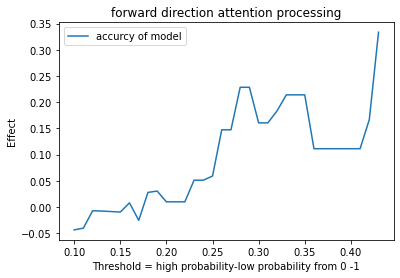

[-0.043820947963692146, -0.04038734254251497, -0.00729462108772453, -0.007780929160239506, -0.008753545305269445, -0.009726161450299383, 0.007787910452487259, -0.025620653623031744, 0.027753831417624514, 0.030276907001044927, 0.009770114942528729, 0.009770114942528729, 0.009770114942528729, 0.0510727969348659, 0.0510727969348659, 0.05893015030946065, 0.1471743295019157, 0.1471743295019157, 0.22833333333333333, 0.22833333333333333, 0.16041666666666665, 0.16041666666666665, 0.18333333333333335, 0.2138888888888889, 0.2138888888888889, 0.2138888888888889, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.3333333333333333, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [7]:

import matplotlib.pyplot as plt
l_threshold = np.arange(0.1,1,0.01)  
from numpy import *
print (l_threshold)
creaserate = []
for threshold in l_threshold:
    temp = []
    for i in range(len(forword_pro)):
        if max(forword_pro[i]) - forword_pro[i][0] > threshold:
            index = forword_pro[i].index(max(forword_pro[i]))
            temp.append(f1[i][index] - f1[i][0])
    creaserate.append(mean(temp))
plt.plot(l_threshold, creaserate, label = "accurcy of model")
plt.xlabel('Threshold = high probability-low probability from 0 -1')
plt.ylabel('Effect')
plt.title("forward direction attention processing")
plt.legend()
plt.show()
print(creaserate)

### 反向注意力

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]


C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


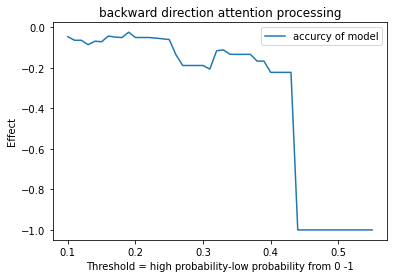

In [8]:
l_threshold = np.arange(0.1,1,0.01)  
print (l_threshold)
creaserate = []
for threshold in l_threshold:
    temp = []
    for i in range(len(backword_pro)):
        if max(backword_pro[i]) - backword_pro[i][0] > threshold:
            index = backword_pro[i].index(max(backword_pro[i]))
            temp.append(f1[i][index] - f1[i][0])
    creaserate.append(mean(temp))
plt.plot(l_threshold, creaserate,  label = "accurcy of model")
plt.xlabel('Threshold = high probability-low probability from 0 -1')
plt.ylabel('Effect')
plt.title("backward direction attention processing")
plt.legend()
plt.show()

## 总注意力

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]


C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


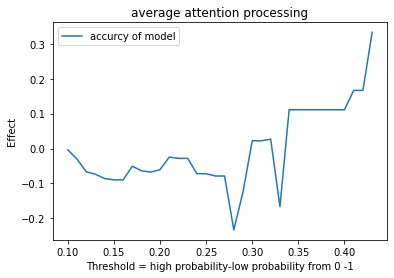

In [9]:
l_threshold = np.arange(0.1,1,0.01)  
print (l_threshold)
creaserate = []
for threshold in l_threshold:
    temp = []
    for i in range(len(sun_pro)):
        if max(sun_pro[i]) - sun_pro[i][0] > threshold:
            index = sun_pro[i].index(max(sun_pro[i]))
            temp.append(f1[i][index] - f1[i][0])
    creaserate.append(mean(temp))
plt.plot(l_threshold, creaserate, label = "accurcy of model")
plt.xlabel('Threshold = high probability-low probability from 0 -1')
plt.ylabel('Effect')
plt.title("average attention processing")
plt.legend()
plt.show()

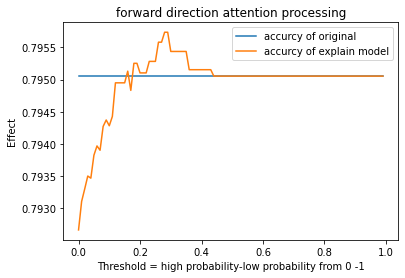

acc_ori :  100


In [10]:
import numpy as np
import matplotlib.pyplot as plt
l_threshold = np.arange(0,1,0.01)  

acc_ori = []
acc_exp = []
for threshold in l_threshold:
    temp_ori = []
    temp_exp = []
    for i in range(len(forword_pro)):
        if max(forword_pro[i]) - forword_pro[i][0] > threshold:
            index = forword_pro[i].index(max(forword_pro[i]))
            temp_exp.append(f1[i][index])
            temp_ori.append(f1[i][0])
        else:
            temp_exp.append(f1[i][0])
            temp_ori.append(f1[i][0])
    acc_ori.append(mean(temp_ori))
    acc_exp.append(mean(temp_exp))
plt.plot(l_threshold, acc_ori, label = "accurcy of original")
plt.plot(l_threshold, acc_exp, label = "accurcy of explain model")
plt.xlabel('Threshold = high probability-low probability from 0 -1')
plt.ylabel('Effect')
plt.title("forward direction attention processing")
plt.legend()
plt.show()
print("acc_ori : ", len(acc_ori))

In [11]:
for i in range(len(acc_ori)):
    if acc_ori[i] < acc_exp[i]:
        print("When Threshold : ", i, "%   \r\n Model promote", acc_exp[i] - acc_ori[i],"\r\n",  acc_ori[i], "->", acc_exp[i])

When Threshold :  16 %   
 Model promote 7.65795723874918e-05 
 0.7950529619072053 -> 0.7951295414795928
When Threshold :  18 %   
 Model promote 0.00019847793624050425 
 0.7950529619072053 -> 0.7952514398434458
When Threshold :  19 %   
 Model promote 0.00019847793624050425 
 0.7950529619072053 -> 0.7952514398434458
When Threshold :  20 %   
 Model promote 4.949104708673602e-05 
 0.7950529619072053 -> 0.795102452954292
When Threshold :  21 %   
 Model promote 4.949104708673602e-05 
 0.7950529619072053 -> 0.795102452954292
When Threshold :  22 %   
 Model promote 4.949104708673602e-05 
 0.7950529619072053 -> 0.795102452954292
When Threshold :  23 %   
 Model promote 0.0002282753140712135 
 0.7950529619072053 -> 0.7952812372212765
When Threshold :  24 %   
 Model promote 0.0002282753140712135 
 0.7950529619072053 -> 0.7952812372212765
When Threshold :  25 %   
 Model promote 0.0002282753140712135 
 0.7950529619072053 -> 0.7952812372212765
When Threshold :  26 %   
 Model promote 0.00052

In [12]:
temp = []
index = 999
for i in range(len(forword_pro)):
    if max(forword_pro[i]) - forword_pro[i][0] > 0.7:
        index = forword_pro[i].index(max(forword_pro[i]))
        temp.append(f1[i][index] - f1[i][0])
print("概率提升成功的平均提升", mean(temp))

概率提升成功的平均提升 nan


C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\GZK\Anaconda3\envs\xai\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
f1

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0,